In [1]:
from keras import layers
# 有32个输出单元的密集层
layer=layers.Dense(32,input_shape=(784,))

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(32,input_shape=(784,)))
# 第二层没有输入形状（input_shape）的参数，但它可以自动推导出输入形状等于上一层的输出形状
model.add(layers.Dense(32))

In [3]:
from keras.datasets import imdb
# 加载IMDB数据集
# 仅保留训练数据中前10000个最常出现的单词，低频单词将被舍弃，便于处理
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 17s 1us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
train_data.shape

(25000,)

In [7]:
max([max(sequence)for sequence in train_data])

9999

In [8]:
# 将某条评论迅速解码为英文单词

# word_index是一个将单词映射为整数索引的字典
word_index=imdb.get_word_index()

# 键值颠倒，将整数索引映射为单词
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
# 将评论解码
# 注意，索引减去了3，因为0、1、2是为“padding”、“start of sequence”、“unknown”分别保留的索引
decoded_review=' '.join([reverse_word_index.get(i-3,'?')for i in train_data[0]])

1646592/1641221 [==============================] - 6s 4us/step


In [9]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [10]:
# 准备数据
# 对列表进行one-hot编码，使其转换为0和1组成的向量
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    # 创建一个形状为(len(sequences),dimension)的矩阵
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        # 将results[i]的指定索引设为1
        results[i,sequence]=1.
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# 将标签向量化
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [13]:
y_train[0]

1.0

In [14]:
# 模型定义
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [15]:
# 编译模型
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [17]:
# 配置优化器
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [18]:
# 使用自定义的损失和指标
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [19]:
# 将原始训练数据留出10000个样本作为验证集
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [21]:
# 训练模型
# 将验证数据传入validation_data参数
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.5084 - acc: 0.7815 - val_loss: 0.3795 - val_acc: 0.8689
Epoch 2/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3003 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2179 - acc: 0.9289 - val_loss: 0.3084 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1751 - acc: 0.9439 - val_loss: 0.2839 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1150 - acc: 0.9653 - val_loss: 0.3149 - val_acc: 0.8774
Epoch 7/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.0979 - acc: 0.9706 - val_loss: 0.3128 - 

In [22]:
# 调用model.fit()返回了一个History对象
# 这个对象有一个成员history，它是一个字典，包含训练过程中的所有数据

history_dict=history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


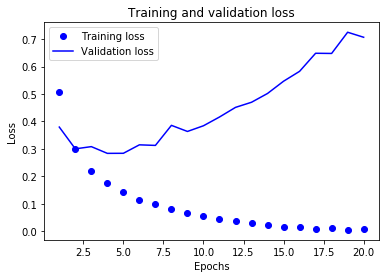

In [24]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

# 'bo'表示蓝色圆点
plt.plot(epochs,loss_values,'bo',label='Training loss')
# 'b'表示蓝色实线
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 验证损失似乎在第4轮达到最佳值

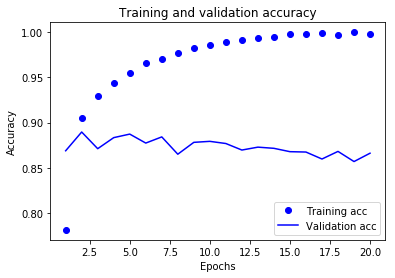

In [25]:
# 绘制训练精度和验证精度
# 清空图像
#plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 验证精度也在第4轮左右达到最佳值

In [26]:
# 防止过拟合
# 从头开始训练一个新的网络

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

print(results)
# 测试损失、测试精度

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.4751 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2657 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.1985 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 2s 71us/step
[0.3237916405105591, 0.87332]


In [27]:
# 使用训练好的网络在新数据上生成预测结果
model.predict(x_test)

array([[0.1378261 ],
       [0.9996991 ],
       [0.29350218],
       ...,
       [0.07244045],
       [0.04332919],
       [0.46909037]], dtype=float32)

In [29]:
# 加载路透社数据集
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 6s 3us/step


In [31]:
len(train_data)

8982

In [32]:
len(test_data)

2246

In [33]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [38]:
# 将索引解码为新闻文本
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

print(decoded_newswire)

557056/550378 [==============================] - 4s 7us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [39]:
train_labels[10]

3

In [40]:
# 编码数据
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

# 训练数据向量化
x_train=vectorize_sequences(train_data)
# 测试数据向量化
x_test=vectorize_sequences(test_data)

In [41]:
# 标签one-hot编码
def to_one_hot(labels,dimension=46):
    results=np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results

# 将训练标签向量化
one_hot_train_labels=to_one_hot(train_labels)
# 将测试标签向量化
one_hot_test_labels=to_one_hot(test_labels)

In [43]:
# Keras内置方法可以实现one-hot编码
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [44]:
# 模型定义
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [45]:
# 编译模型
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [46]:
# 留出验证集
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [48]:
# 训练模型
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 191us/step - loss: 2.5240 - acc: 0.4982 - val_loss: 1.7179 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.4444 - acc: 0.6885 - val_loss: 1.3502 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.0994 - acc: 0.7638 - val_loss: 1.1759 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.8733 - acc: 0.8158 - val_loss: 1.0824 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.7069 - acc: 0.8480 - val_loss: 0.9878 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.5700 - acc: 0.8785 - val_loss: 0.9409 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.4630 - acc: 0.9033 - val_loss: 0.9084 - val_acc: 0.8010


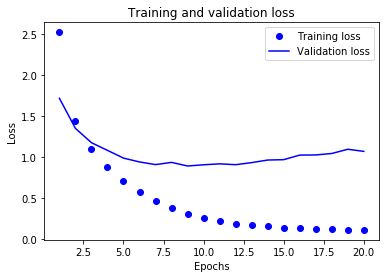

In [49]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

# 'bo'表示蓝色圆点
plt.plot(epochs,loss_values,'bo',label='Training loss')
# 'b'表示蓝色实线
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

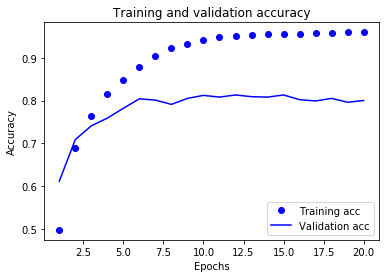

In [50]:
# 绘制训练精度和验证精度
# 清空图像
#plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
# 网络在训练9轮后开始过拟合

In [53]:
# 从头开始训练一个新模型
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
                 partial_y_train,
                 epochs=9,
                 batch_size=512,
                 validation_data=(x_val,y_val))
results=model.evaluate(x_test,one_hot_test_labels)
print(results)
# 近80%的精度

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 162us/step - loss: 2.6980 - acc: 0.5242 - val_loss: 1.8318 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.4955 - acc: 0.6927 - val_loss: 1.3626 - val_acc: 0.7020
Epoch 3/9
7982/7982 [==============================] - 1s 116us/step - loss: 1.0958 - acc: 0.7628 - val_loss: 1.1733 - val_acc: 0.7390
Epoch 4/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.8597 - acc: 0.8191 - val_loss: 1.0693 - val_acc: 0.7690
Epoch 5/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.6861 - acc: 0.8607 - val_loss: 0.9793 - val_acc: 0.7880
Epoch 6/9
7982/7982 [==============================] - 1s 133us/step - loss: 0.5460 - acc: 0.8884 - val_loss: 0.9278 - val_acc: 0.8070
Epoch 7/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.4365 - acc: 0.9116 - val_loss: 0.9043 - val_acc: 0.8090
Epoch 8

In [54]:
# 完全随机的精度约为19%
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hists_array=np.array(test_labels)==np.array(test_labels_copy)
float(np.sum(hists_array))/len(test_labels)

0.1892252894033838

In [55]:
# 在新数据上生成预测结果
predictions=model.predict(x_test)

In [56]:
predictions[0].shape

(46,)

In [57]:
np.sum(predictions[0])

0.9999998

In [58]:
np.argmax(predictions[0])

3

In [ ]:
# 处理标签和损失的另一种方法
# 将编码标签转换为整数张量
y_train=np.array(train_labels)
y_test=np.array(test_labels)

# 损失函数选择sparse_categorical_crossentropy
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [60]:
# 具有信息瓶颈的模型
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val,y_val))

results=model.evaluate(x_test,one_hot_test_labels)
print(results)

# 多分类时应该避免使用太小的中间层，以免在网络中造成信息瓶颈

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 188us/step - loss: 3.2060 - acc: 0.2305 - val_loss: 2.6417 - val_acc: 0.3490
Epoch 2/20
7982/7982 [==============================] - 1s 143us/step - loss: 2.1765 - acc: 0.5035 - val_loss: 1.8400 - val_acc: 0.5980
Epoch 3/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.5769 - acc: 0.6497 - val_loss: 1.5275 - val_acc: 0.6500
Epoch 4/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.3258 - acc: 0.6785 - val_loss: 1.4284 - val_acc: 0.6700
Epoch 5/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.1873 - acc: 0.7162 - val_loss: 1.3860 - val_acc: 0.6810
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.0971 - acc: 0.7286 - val_loss: 1.3900 - val_acc: 0.6740
Epoch 7/20
7982/7982 [==============================] - 1s 139us/step - loss: 1.0337 - acc: 0.7313 - val_loss: 1.3904 - val_acc: 0.6790


In [63]:
# 加载波士顿房价数据
from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

In [64]:
# 每个样本有13个特征
train_data.shape

(404, 13)

In [65]:
test_data.shape

(102, 13)

In [66]:
# 目标是房屋价格的中位数
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [67]:
# 数据标准化
# 用NumPy可以很容易实现标准化
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std

In [68]:
# 构建网络
from keras import models
from keras import layers

# 因为需要将同一个模型多次实例化
# 所以用一个函数来构建模型
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    # 网络的最后一层只有一个单元，没有激活，是一个线性层
    # 这是标量回归的典型设置
    model.add(layers.Dense(1))
    # 编译网络用的是mse损失函数，即均方误差，预测值与目标值之差的平方
    # 训练过程中监控了一个新指标：平均绝对误差（mae），它是预测值与目标值之差的绝对值
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model


In [70]:
# K折验证
import numpy as np

k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]

for i in range(k):
    print('processing fold #',i)
    # 准备验证数据：第k个分区的数据
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # 准备训练数据：其他所有分区的数据
    partial_train_data=np.concatenate(
    [train_data[:i*num_val_samples],
     train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],
                                         train_targets[(i+1)*num_val_samples:]],
                                        axis=0)
    
    # 构建Keras模型（已编译）
    model=build_model()
    # 训练数据（静默模式，verbose=0）
    model.fit(partial_train_data,partial_train_targets,
             epochs=num_epochs,batch_size=1,verbose=0)
    # 在验证数据上评估模型
    val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [71]:
all_scores

[2.121874514192638, 2.231507176219827, 2.9456857808745736, 2.3530605990107696]

In [72]:
np.mean(all_scores)

2.413032017574452

In [73]:
# 让训练时间更长一些，达到500个轮次
# 保存每轮的验证分数记录
num_epochs=500
all_mae_histories=[]

for i in range(k):
    print('processing fold #',i)
    # 准备验证数据：第k个分区的数据
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # 准备训练数据：其他所有分区的数据
    partial_train_data=np.concatenate(
    [train_data[:i*num_val_samples],
     train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],
                                         train_targets[(i+1)*num_val_samples:]],
                                        axis=0)
    
    # 构建Keras模型（已编译）
    model=build_model()
    # 训练数据（静默模式，verbose=0）
    history=model.fit(partial_train_data,partial_train_targets,
                      validation_data=(val_data,val_targets),
                      epochs=num_epochs,batch_size=1,verbose=0)
    mae_history=history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [74]:
# 计算所有轮次中的K折验证分数平均值
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

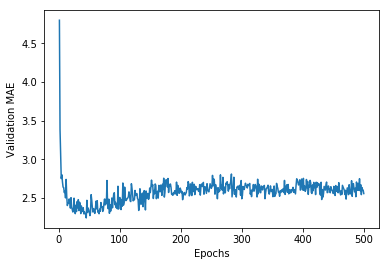

In [75]:
# 绘制验证分数
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

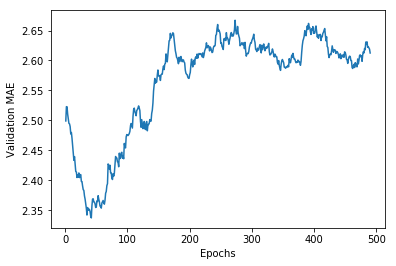

In [76]:
# 绘制验证分数（删除前10个数据点）
# 删除前10个数据点，因为它们的取值范围与曲线上的其他点不同
# 将每个数据点替换为前面数据点的指数移动平均值，以得到光滑的曲线

def smooth_curve(points,factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history=smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [79]:
smooth_mae_history[39:50]
# 索引为41处值最小
# 验证MAE在80之后不再显著降低，之后就开始过拟合

[2.347727953676534,
 2.3399111235587258,
 2.3371530058206553,
 2.3574997829072233,
 2.368636425161652,
 2.3691304072140484,
 2.3637794545242237,
 2.363433905685763,
 2.3608227997669506,
 2.354522437206479,
 2.355306511044875]

In [88]:
# 训练最终模型
# 一个全新的编译好的模型
model=build_model()
# 在所有训练数据上训练模型
model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)
print('test_mse_score:',test_mse_score)
print('test_mae_score:',test_mae_score)

102/102 [==============================] - 0s 2ms/step
test_mse_score: 16.02497085870481
test_mae_score: 2.565563117756563
